<a href="https://colab.research.google.com/github/nanmanchu/APTprice/blob/main/5_Classical_Statistical_Analysis%2C_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리, 파일 불러오기


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm; 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

#정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

import seaborn as sns

#변수 더미화
#from patsy import dmatrix


from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apt/data20k.csv')
df=data.copy()

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,5.0,5.0,114.94,18,2003.0,3.092903e+08,1616.0,1.173,5.289716e+05,1378.0,2008,5.0,1,0,0,0,0
1,5.0,5.0,53.94,1,1974.0,6.600000e+07,1616.0,1.173,8.527994e+05,1378.0,2007,33.0,0,0,0,0,1
2,5.0,5.0,42.38,4,1972.0,4.130769e+07,1616.0,1.173,9.910335e+05,1378.0,2006,34.0,0,0,0,1,0
3,5.0,5.0,84.99,6,2008.0,6.992266e+08,7876.0,1.416,1.176609e+06,5562.0,2010,2.0,0,1,0,0,0
4,5.0,5.0,95.76,1,2006.0,1.180000e+08,7876.0,1.416,1.357561e+06,5562.0,2009,3.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21263,2.0,1.0,35.44,18,2017.0,1.709800e+09,1120.0,1.628,4.415914e+07,688.0,2021,4.0,1,0,0,0,0
21264,2.0,2.0,59.92,17,2018.0,1.875400e+09,1192.0,1.560,4.422563e+07,764.0,2021,3.0,0,1,0,0,0
21265,2.0,1.0,59.69,7,2011.0,3.520189e+09,1732.0,2.887,4.439605e+07,600.0,2021,10.0,0,0,1,0,0
21266,1.0,2.0,98.99,32,2020.0,2.623077e+09,1202.0,1.588,4.545914e+07,757.0,2021,1.0,0,1,0,0,0


# 랜덤 추출

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apt/0427.csv')

In [ ]:
df = df.rename(columns={'saedae':'household'})
df

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,NaN,NaN,105.99,4,2009.0,5.133333e+08,NaN,NaN,5.283517e+06,NaN,2009,0.0,0,1,0,0,0
1,NaN,NaN,89.55,8,2009.0,4.573333e+08,NaN,NaN,7.356784e+06,NaN,2009,0.0,0,1,0,0,0
2,NaN,NaN,270.25,1,2008.0,2.232000e+09,NaN,NaN,1.047249e+07,NaN,2009,1.0,0,1,0,0,0
3,NaN,NaN,84.89,4,2008.0,6.251429e+08,NaN,NaN,8.834963e+06,NaN,2009,1.0,0,1,0,0,0
4,NaN,NaN,211.20,6,2008.0,1.848000e+09,NaN,NaN,1.136364e+07,NaN,2009,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205245,NaN,NaN,54.53,2,2002.0,1.710000e+08,NaN,NaN,6.051715e+06,NaN,2021,19.0,0,0,0,0,1
1205246,NaN,NaN,84.91,3,2002.0,2.740000e+08,NaN,NaN,5.535273e+06,NaN,2021,19.0,0,0,0,0,1
1205247,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.903382e+06,NaN,2021,19.0,0,0,0,0,1
1205248,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.734300e+06,NaN,2021,19.0,0,0,0,0,1


In [ ]:
nonull=df.copy()
nonull=nonull.dropna(subset=['BEECgroup'])
nonull=nonull.dropna(subset=['Gseed'])
nonull

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
649478,2.0,1.0,92.08,20,2014.0,NaN,1082.0,2.186,8112510.860,495.0,2015,1.0,1,0,0,0,0
649479,2.0,1.0,92.24,24,2014.0,NaN,1082.0,2.186,7588898.526,495.0,2015,1.0,1,0,0,0,0
649480,2.0,1.0,114.55,27,2014.0,NaN,1082.0,2.186,7138192.929,495.0,2015,1.0,1,0,0,0,0
649481,2.0,1.0,114.55,28,2014.0,NaN,1082.0,2.186,6954430.380,495.0,2015,1.0,1,0,0,0,0
649482,2.0,1.0,150.20,29,2014.0,NaN,1082.0,2.186,9229893.475,495.0,2015,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180412,4.0,4.0,50.80,7,2015.0,3.945238e+08,337.0,1.084,9291338.583,311.0,2017,2.0,1,0,0,0,0
1180413,4.0,4.0,59.98,9,2015.0,3.886667e+08,337.0,1.084,9586528.843,311.0,2017,2.0,1,0,0,0,0
1180414,4.0,4.0,59.99,10,2015.0,3.958095e+08,337.0,1.084,9168194.699,311.0,2017,2.0,1,0,0,0,0
1180415,4.0,4.0,84.50,14,2015.0,3.982000e+08,337.0,1.084,7656804.734,311.0,2017,2.0,1,0,0,0,0


In [ ]:
random=df.copy()
random=random[random['BEECgroup'].isnull()]
random=random[random['Gseed'].isnull()]
random

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,NaN,NaN,105.99,4,2009.0,5.133333e+08,NaN,NaN,5.283517e+06,NaN,2009,0.0,0,1,0,0,0
1,NaN,NaN,89.55,8,2009.0,4.573333e+08,NaN,NaN,7.356784e+06,NaN,2009,0.0,0,1,0,0,0
2,NaN,NaN,270.25,1,2008.0,2.232000e+09,NaN,NaN,1.047249e+07,NaN,2009,1.0,0,1,0,0,0
3,NaN,NaN,84.89,4,2008.0,6.251429e+08,NaN,NaN,8.834963e+06,NaN,2009,1.0,0,1,0,0,0
4,NaN,NaN,211.20,6,2008.0,1.848000e+09,NaN,NaN,1.136364e+07,NaN,2009,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205245,NaN,NaN,54.53,2,2002.0,1.710000e+08,NaN,NaN,6.051715e+06,NaN,2021,19.0,0,0,0,0,1
1205246,NaN,NaN,84.91,3,2002.0,2.740000e+08,NaN,NaN,5.535273e+06,NaN,2021,19.0,0,0,0,0,1
1205247,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.903382e+06,NaN,2021,19.0,0,0,0,0,1
1205248,NaN,NaN,41.40,4,2002.0,1.087733e+08,NaN,NaN,4.734300e+06,NaN,2021,19.0,0,0,0,0,1


In [ ]:
for i in range(1,11):
  globals()["random{}".format(i)]= random.sample(n=10634)

In [ ]:
random1

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
1186849,NaN,NaN,84.92,20,2004.0,2.310000e+08,397.0,1.118,3650494.583,355.0,2006,2.0,1,0,0,0,0
300975,NaN,NaN,44.96,5,1965.0,1.406667e+08,NaN,NaN,7050711.744,NaN,2010,45.0,0,0,1,0,0
824284,NaN,NaN,84.30,9,2005.0,2.522000e+08,494.0,1.021,4620403.321,484.0,2013,8.0,1,0,0,0,0
482059,NaN,NaN,61.52,11,1990.0,1.215682e+08,1081.0,0.412,2722691.808,2626.0,2006,16.0,1,0,0,0,0
1074819,NaN,NaN,55.72,10,1988.0,1.886667e+08,NaN,NaN,3391959.799,NaN,2007,19.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862442,NaN,NaN,75.33,7,1987.0,1.702069e+08,0.0,0.000,3093057.215,348.0,2014,27.0,1,0,0,0,0
171104,NaN,NaN,84.86,8,2003.0,2.240000e+08,108.0,1.149,3888757.954,94.0,2008,5.0,1,0,0,0,0
324172,NaN,NaN,59.76,9,1996.0,1.517361e+08,0.0,0.000,4267068.273,1609.0,2014,18.0,1,0,0,0,0
1131599,NaN,NaN,114.84,12,2004.0,2.906993e+08,3146.0,1.120,5660048.763,2810.0,2020,16.0,0,0,0,0,1


In [ ]:
random10

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
1040312,NaN,NaN,68.86,3,1988.0,2.277143e+08,0.0,0.000,4.501888e+06,780.0,2016,28.0,1,0,0,0,0
1121010,NaN,NaN,33.18,8,1992.0,5.703718e+08,0.0,0.000,2.350814e+07,1163.0,2019,27.0,0,1,0,0,0
412883,NaN,NaN,59.91,5,1990.0,2.805000e+08,0.0,0.000,6.342848e+06,693.0,2016,26.0,1,0,0,0,0
948132,NaN,NaN,84.98,13,2008.0,6.494348e+08,720.0,1.141,1.306190e+07,631.0,2020,12.0,0,1,0,0,0
363773,NaN,NaN,59.73,3,2000.0,1.541930e+08,502.0,0.585,4.503600e+06,858.0,2009,9.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125174,NaN,NaN,59.22,1,2000.0,2.562581e+08,716.0,1.129,4.154002e+06,634.0,2009,9.0,1,0,0,0,0
426281,NaN,NaN,95.06,13,1986.0,5.535714e+08,1444.0,0.781,9.888491e+06,1848.0,2016,30.0,0,0,0,0,1
419154,NaN,NaN,85.00,16,2006.0,2.891842e+08,819.0,1.108,4.470588e+06,739.0,2012,6.0,1,0,0,0,0
1106302,NaN,NaN,58.14,13,1995.0,3.811176e+08,230.0,0.226,1.004472e+07,1016.0,2019,24.0,0,0,0,0,1


In [ ]:
for i in range(1,11):
  globals()["data{}".format(i)]= pd.concat([nonull,globals()["random{}".format(i)]])

In [ ]:
data1

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
649478,2.0,1.0,92.08,20,2014.0,NaN,1082.0,2.186,8112510.860,495.0,2015,1.0,1,0,0,0,0
649479,2.0,1.0,92.24,24,2014.0,NaN,1082.0,2.186,7588898.526,495.0,2015,1.0,1,0,0,0,0
649480,2.0,1.0,114.55,27,2014.0,NaN,1082.0,2.186,7138192.929,495.0,2015,1.0,1,0,0,0,0
649481,2.0,1.0,114.55,28,2014.0,NaN,1082.0,2.186,6954430.380,495.0,2015,1.0,1,0,0,0,0
649482,2.0,1.0,150.20,29,2014.0,NaN,1082.0,2.186,9229893.475,495.0,2015,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862442,NaN,NaN,75.33,7,1987.0,1.702069e+08,0.0,0.000,3093057.215,348.0,2014,27.0,1,0,0,0,0
171104,NaN,NaN,84.86,8,2003.0,2.240000e+08,108.0,1.149,3888757.954,94.0,2008,5.0,1,0,0,0,0
324172,NaN,NaN,59.76,9,1996.0,1.517361e+08,0.0,0.000,4267068.273,1609.0,2014,18.0,1,0,0,0,0
1131599,NaN,NaN,114.84,12,2004.0,2.906993e+08,3146.0,1.120,5660048.763,2810.0,2020,16.0,0,0,0,0,1


In [ ]:
data10

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
649478,2.0,1.0,92.08,20,2014.0,NaN,1082.0,2.186,8.112511e+06,495.0,2015,1.0,1,0,0,0,0
649479,2.0,1.0,92.24,24,2014.0,NaN,1082.0,2.186,7.588899e+06,495.0,2015,1.0,1,0,0,0,0
649480,2.0,1.0,114.55,27,2014.0,NaN,1082.0,2.186,7.138193e+06,495.0,2015,1.0,1,0,0,0,0
649481,2.0,1.0,114.55,28,2014.0,NaN,1082.0,2.186,6.954430e+06,495.0,2015,1.0,1,0,0,0,0
649482,2.0,1.0,150.20,29,2014.0,NaN,1082.0,2.186,9.229893e+06,495.0,2015,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125174,NaN,NaN,59.22,1,2000.0,2.562581e+08,716.0,1.129,4.154002e+06,634.0,2009,9.0,1,0,0,0,0
426281,NaN,NaN,95.06,13,1986.0,5.535714e+08,1444.0,0.781,9.888491e+06,1848.0,2016,30.0,0,0,0,0,1
419154,NaN,NaN,85.00,16,2006.0,2.891842e+08,819.0,1.108,4.470588e+06,739.0,2012,6.0,1,0,0,0,0
1106302,NaN,NaN,58.14,13,1995.0,3.811176e+08,230.0,0.226,1.004472e+07,1016.0,2019,24.0,0,0,0,0,1


In [ ]:
for i in range(1,11):
  globals()["data{}".format(i)]['BEECgroup']= globals()["data{}".format(i)].BEECgroup.fillna(5)
  globals()["data{}".format(i)]['Gseed']= globals()["data{}".format(i)].Gseed.fillna(5)


In [ ]:
data1

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
649478,2.0,1.0,92.08,20,2014.0,NaN,1082.0,2.186,8112510.860,495.0,2015,1.0,1,0,0,0,0
649479,2.0,1.0,92.24,24,2014.0,NaN,1082.0,2.186,7588898.526,495.0,2015,1.0,1,0,0,0,0
649480,2.0,1.0,114.55,27,2014.0,NaN,1082.0,2.186,7138192.929,495.0,2015,1.0,1,0,0,0,0
649481,2.0,1.0,114.55,28,2014.0,NaN,1082.0,2.186,6954430.380,495.0,2015,1.0,1,0,0,0,0
649482,2.0,1.0,150.20,29,2014.0,NaN,1082.0,2.186,9229893.475,495.0,2015,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862442,5.0,5.0,75.33,7,1987.0,1.702069e+08,0.0,0.000,3093057.215,348.0,2014,27.0,1,0,0,0,0
171104,5.0,5.0,84.86,8,2003.0,2.240000e+08,108.0,1.149,3888757.954,94.0,2008,5.0,1,0,0,0,0
324172,5.0,5.0,59.76,9,1996.0,1.517361e+08,0.0,0.000,4267068.273,1609.0,2014,18.0,1,0,0,0,0
1131599,5.0,5.0,114.84,12,2004.0,2.906993e+08,3146.0,1.120,5660048.763,2810.0,2020,16.0,0,0,0,0,1


In [ ]:
for i in range(1,11):
  globals()["data{}".format(i)] = globals()["data{}".format(i)].sort_values(by='pricePerM2')
  globals()["data{}".format(i)] = globals()["data{}".format(i)].fillna(method='ffill')
  globals()["data{}".format(i)] = globals()["data{}".format(i)].fillna(method='bfill')
  globals()["data{}".format(i)]=globals()["data{}".format(i)].reset_index()

In [ ]:
for i in range(1,11):
  #globals()["data{}".format(i)]=globals()["data{}".format(i)].drop(['index'], axis=1)
  globals()["data{}".format(i)]=globals()["data{}".format(i)].drop(['level_0'], axis=1)

In [ ]:
for i in range(1,11):
  globals()["corr{}".format(i)]=globals()["data{}".format(i)].corr(method="pearson")
  globals()["corr{}".format(i)]=globals()["corr{}".format(i)]["pricePerM2"].sort_values(ascending=False)


In [ ]:
for i in range(1,11):
  print (globals()["corr{}".format(i)])
  print()
  print ("#################################")
  print()

pricePerM2               1.000000
officialValue            0.772423
year                     0.618922
ConstructionYear         0.499583
ParkingSpace             0.434172
parking                  0.353597
districtGroup_Dongnam    0.275857
districtGroup_Dosim      0.212334
household                0.210635
floor                    0.198809
area                     0.120248
districtGroup_Seobuk    -0.029450
districtGroup_Seonam    -0.188022
districtGroup_Dongbuk   -0.219534
age                     -0.294911
BEECgroup               -0.556716
Gseed                   -0.573503
Name: pricePerM2, dtype: float64

#################################

pricePerM2               1.000000
officialValue            0.770604
year                     0.621216
ConstructionYear         0.499540
ParkingSpace             0.448111
parking                  0.359016
districtGroup_Dongnam    0.273861
household                0.210749
districtGroup_Dosim      0.208593
floor                    0.201781
area         

In [ ]:
for i in range(1,11):
  (globals()["corr{}".format(i)]) = pd.DataFrame(globals()["corr{}".format(i)])
  (globals()["corr{}".format(i)]) = (globals()["corr{}".format(i)]).transpose()

In [ ]:
corr1

,pricePerM2,officialValue,year,ConstructionYear,ParkingSpace,parking,districtGroup_Dongnam,districtGroup_Dosim,household,floor,area,districtGroup_Seobuk,districtGroup_Seonam,districtGroup_Dongbuk,age,BEECgroup,Gseed
pricePerM2,1.0,0.772423,0.618922,0.499583,0.434172,0.353597,0.275857,0.212334,0.210635,0.198809,0.120248,-0.02945,-0.188022,-0.219534,-0.294911,-0.556716,-0.573503


In [ ]:
corr10

,pricePerM2,officialValue,year,ConstructionYear,ParkingSpace,parking,districtGroup_Dongnam,household,districtGroup_Dosim,floor,area,districtGroup_Seobuk,districtGroup_Seonam,districtGroup_Dongbuk,age,BEECgroup,Gseed
pricePerM2,1.0,0.771025,0.618033,0.49395,0.439202,0.355735,0.277063,0.218191,0.212157,0.20325,0.12128,-0.031606,-0.19324,-0.213548,-0.286513,-0.558092,-0.574877


In [ ]:
all=pd.concat([corr1, corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9,corr10], axis=0)
all

,pricePerM2,officialValue,year,ConstructionYear,ParkingSpace,parking,districtGroup_Dongnam,districtGroup_Dosim,household,floor,area,districtGroup_Seobuk,districtGroup_Seonam,districtGroup_Dongbuk,age,BEECgroup,Gseed
pricePerM2,1.0,0.772423,0.618922,0.499583,0.434172,0.353597,0.275857,0.212334,0.210635,0.198809,0.120248,-0.029450,-0.188022,-0.219534,-0.294911,-0.556716,-0.573503
pricePerM2,1.0,0.770604,0.621216,0.499540,0.448111,0.359016,0.273861,0.208593,0.210749,0.201781,0.124068,-0.024576,-0.194399,-0.213520,-0.292118,-0.555704,-0.572467
pricePerM2,1.0,0.772422,0.620330,0.487205,0.440137,0.351312,0.277968,0.208475,0.205967,0.202100,0.127797,-0.036376,-0.191986,-0.212044,-0.277948,-0.554991,-0.571726
pricePerM2,1.0,0.771900,0.621765,0.507091,0.447489,0.360225,0.278445,0.213913,0.213924,0.200726,0.124318,-0.027285,-0.191078,-0.219474,-0.301798,-0.559776,-0.576532
pricePerM2,1.0,0.774564,0.621669,0.500750,0.445673,0.358680,0.281553,0.209356,0.213081,0.197929,0.126471,-0.030327,-0.197982,-0.212083,-0.293247,-0.558868,-0.575656
pricePerM2,1.0,0.770815,0.621722,0.507011,0.441183,0.361585,0.276713,0.215902,0.220379,0.200422,0.126828,-0.033321,-0.194199,-0.213644,-0.298876,-0.563491,-0.580323
pricePerM2,1.0,0.774328,0.618005,0.484308,0.448868,0.356840,0.284510,0.214096,0.214292,0.200099,0.128448,-0.037827,-0.194181,-0.217642,-0.278682,-0.549354,-0.566015
pricePerM2,1.0,0.772648,0.620258,0.498388,0.423011,0.352380,0.277122,0.214119,0.212734,0.200635,0.124656,-0.029095,-0.190521,-0.219239,-0.289467,-0.555963,-0.572697
pricePerM2,1.0,0.770132,0.615684,0.498801,0.444758,0.355515,0.270594,0.215756,0.210490,0.200175,0.126743,-0.036611,-0.187660,-0.212855,-0.292956,-0.563002,-0.579896
pricePerM2,1.0,0.771025,0.618033,0.493950,0.439202,0.355735,0.277063,0.212157,0.218191,0.203250,0.121280,-0.031606,-0.193240,-0.213548,-0.286513,-0.558092,-0.574877


In [ ]:
all.describe()

,pricePerM2,officialValue,year,ConstructionYear,ParkingSpace,parking,districtGroup_Dongnam,districtGroup_Dosim,household,floor,area,districtGroup_Seobuk,districtGroup_Seonam,districtGroup_Dongbuk,age,BEECgroup,Gseed
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.0,0.772086,0.619760,0.497663,0.441260,0.356488,0.277369,0.212470,0.213044,0.200593,0.125086,-0.031648,-0.192327,-0.215358,-0.290652,-0.557596,-0.574369
std,0.0,0.001509,0.002044,0.007426,0.007917,0.003412,0.003816,0.002805,0.004088,0.001545,0.002709,0.004347,0.003150,0.003201,0.007799,0.004114,0.004170
min,1.0,0.770132,0.615684,0.484308,0.423011,0.351312,0.270594,0.208475,0.205967,0.197929,0.120248,-0.037827,-0.197982,-0.219534,-0.301798,-0.563491,-0.580323
25%,1.0,0.770867,0.618256,0.495059,0.439435,0.354077,0.276071,0.210056,0.210663,0.200118,0.124131,-0.035612,-0.194195,-0.218840,-0.294495,-0.559549,-0.576313
50%,1.0,0.772161,0.620294,0.499170,0.442970,0.356288,0.277092,0.213124,0.212907,0.200528,0.125564,-0.030967,-0.192613,-0.213596,-0.292537,-0.557404,-0.574190
75%,1.0,0.772592,0.621556,0.500458,0.447035,0.358932,0.278326,0.214113,0.214200,0.201517,0.126807,-0.029184,-0.190660,-0.213021,-0.287251,-0.555769,-0.572525
max,1.0,0.774564,0.621765,0.507091,0.448868,0.361585,0.284510,0.215902,0.220379,0.203250,0.128448,-0.024576,-0.187660,-0.212044,-0.277948,-0.549354,-0.566015


# 다중공선성

In [ ]:
# https://bkshin.tistory.com/entry/DATA-19

In [ ]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.539191e+01,BEECgroup
1,1.615393e+01,Gseed
2,2.045540e+00,area
3,1.120662e+00,floor
4,inf,ConstructionYear
5,5.963883e+00,officialValue
6,8.005977e+00,parking
7,2.950627e+00,ParkingSpace
8,5.545118e+00,pricePerM2
9,6.677426e+00,household


In [ ]:
#정규화
scaler = StandardScaler()  #StandardScaler

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(df)
ssss2 = scaler.transform(df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df = pd.DataFrame(data=ssss2, columns=df.columns)

In [ ]:
#보간법
#https://seong6496.tistory.com/84

#drop.interpolate(method='linear',limit_direction='forward')

# OLS

In [ ]:
#aa=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apt/old/dataC_ver1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,5,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#aa.dtypes

지번코드           object
신고년도            int64
계약일자           object
자치구명           object
건물명_x          object
대지위치           object
물건금액            int64
m2당가격         float64
공시지가(원/㎡)     float64
건물면적          float64
용적률           float64
건폐율           float64
총주차수          float64
주차스트레스        float64
에너지효율등급        object
에너지절감률        float64
친환경건축물등급       object
친환경건축물인증점수    float64
EPI점수         float64
건축년도          float64
층               int64
세대수           float64
dtype: object

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apt/isol3.csv')

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,0.0,0.0,97.86,6,2005.0,2.820000e+08,2431.0,1.428,5.109340e+04,1702.0,2008,3.0,0,1,0,0,0
1,0.0,0.0,84.78,3,2004.0,1.880000e+08,2431.0,1.428,5.897617e+04,1702.0,2007,3.0,0,1,0,0,0
2,0.0,0.0,56.97,7,1999.0,9.900000e+07,2431.0,1.428,6.143584e+04,1702.0,2010,11.0,0,0,0,0,1
3,0.0,0.0,100.53,2,2008.0,9.900000e+07,2431.0,1.428,7.858351e+04,1702.0,2008,0.0,0,0,0,1,0
4,0.0,0.0,83.70,2,2008.0,9.900000e+07,2431.0,1.428,7.885305e+04,1702.0,2008,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,0.0,0.0,59.52,3,1999.0,5.922941e+08,2280.0,1.324,1.444892e+07,1722.0,2018,19.0,0,1,0,0,0
1090437,0.0,0.0,105.89,3,1979.0,9.753663e+08,0.0,0.000,1.444896e+07,1212.0,2017,38.0,0,1,0,0,0
1090438,0.0,0.0,84.78,2,1994.0,5.937931e+08,0.0,0.000,1.444916e+07,638.0,2018,24.0,0,0,1,0,0
1090439,0.0,0.0,55.02,10,1987.0,7.107222e+08,1879.0,0.606,1.444929e+07,3100.0,2019,32.0,0,0,0,0,1


In [ ]:
df['BEECgroup'] = df['BEECgroup'].replace(0, np.NaN)
df['Gseed'] = df['Gseed'].replace(0, np.NaN)

In [ ]:
df['BEECgroup']=df.BEECgroup.fillna(5)
df['Gseed']=df.Gseed.fillna(5)

In [ ]:
df

,BEECgroup,Gseed,area,floor,ConstructionYear,OfficialValue,parking,ParkingSpace,pricePerM2,Households,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
0,5.0,5.0,97.86,6,2005.0,2.820000e+08,2431.0,1.428,5.109340e+04,1702.0,2008,3.0,0,1,0,0,0
1,5.0,5.0,84.78,3,2004.0,1.880000e+08,2431.0,1.428,5.897617e+04,1702.0,2007,3.0,0,1,0,0,0
2,5.0,5.0,56.97,7,1999.0,9.900000e+07,2431.0,1.428,6.143584e+04,1702.0,2010,11.0,0,0,0,0,1
3,5.0,5.0,100.53,2,2008.0,9.900000e+07,2431.0,1.428,7.858351e+04,1702.0,2008,0.0,0,0,0,1,0
4,5.0,5.0,83.70,2,2008.0,9.900000e+07,2431.0,1.428,7.885305e+04,1702.0,2008,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090436,5.0,5.0,59.52,3,1999.0,5.922941e+08,2280.0,1.324,1.444892e+07,1722.0,2018,19.0,0,1,0,0,0
1090437,5.0,5.0,105.89,3,1979.0,9.753663e+08,0.0,0.000,1.444896e+07,1212.0,2017,38.0,0,1,0,0,0
1090438,5.0,5.0,84.78,2,1994.0,5.937931e+08,0.0,0.000,1.444916e+07,638.0,2018,24.0,0,0,1,0,0
1090439,5.0,5.0,55.02,10,1987.0,7.107222e+08,1879.0,0.606,1.444929e+07,3100.0,2019,32.0,0,0,0,0,1


In [ ]:
#정규화
scaler = StandardScaler()  #StandardScaler

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(df)
ssss2 = scaler.transform(df)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df = pd.DataFrame(data=ssss2, columns=df.columns)

In [ ]:
#age, 파킹, 권역생활권 속성 제거 

x_data = df[['BEECgroup', 'Gseed', 'area', 'OfficialValue', 'ConstructionYear', 'ParkingSpace', 'floor', 'Households', 'year']]
target = df[['pricePerM2']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pricePerM2   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 3.993e+05
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:12:51   Log-Likelihood:            -7.5252e+05
No. Observations:             1090441   AIC:                         1.505e+06
Df Residuals:                 1090431   BIC:                         1.505e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.447e-15      0.000    5.3e-12      1.000      -0.001       0.001
BEECgroup           -0.0192      0.001    -31.960      0.000      -0.020      -0.018
Gseed               -0.0144      0.001    -23.907      0.000      -0.016      -0.013
area                -0.3409      0.001   -632.826      0.000      -0.342      -0.340
OfficialValue        0.8636      0.001   1525.119      0.000       0.863       0.865
ConstructionYear    -0.0200      0.001    -37.067      0.000      -0.021      -0.019
ParkingSpace         0.0136      0.001     25.584      0.000       0.013       0.015
floor               -0.0338      0.000    -70.834      0.000      -0.035      -0.033
Households           0.0445      0.000     93.655      0.000       0.044       0.045
year                 0.2702      0.000    560.196      0.000       0.269       0.271
==============================================================================
Omnibus:                   174018.876   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1964885.983
Skew:                           0.417   Prob(JB):                         0.00
Kurtosis:                       9.523   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ANOVA

In [ ]:
from statsmodels.stats.anova import anova_lm

In [ ]:
df=data.copy()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


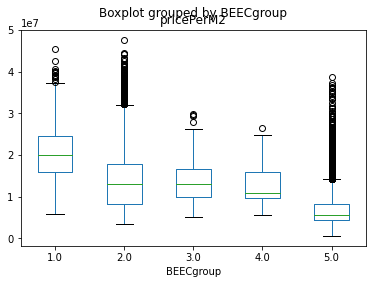

In [ ]:
# BEEC 그룹별 가격
df.boxplot(column = 'pricePerM2', by='BEECgroup' , grid = False)

In [ ]:
# formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
# lm = ols(formula, df).fit()
# print(anova_lm(lm))

#https://blog.naver.com/PostView.naver?blogId=breezehome50&logNo=222345894142&redirect=Dlog&widgetTypeCall=true&directAccess=false

model = ols('pricePerM2 ~ C(BEECgroup) * C(Gseed)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(BEECgroup),4.0,7113.484420,1778.371105,2951.365607,0.000000e+00
C(Gseed),4.0,1214.214065,303.553516,503.774159,0.000000e+00
C(BEECgroup):C(Gseed),16.0,141.102640,8.818915,14.635777,1.583555e-40
Residual,21256.0,12807.988314,0.602559,NaN,NaN


In [ ]:
# formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
# lm = ols(formula, df).fit()
# print(anova_lm(lm))

#https://blog.naver.com/PostView.naver?blogId=breezehome50&logNo=222345894142&redirect=Dlog&widgetTypeCall=true&directAccess=false

model = ols('BEECgroup ~ pricePerM2', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
pricePerM2,1.0,14632.787686,14632.787686,9709.84766,0.0
Residual,21266.0,32047.965511,1.507005,NaN,NaN


In [ ]:
model = ols('pricePerM2 ~ BEECgroup', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
BEECgroup,1.0,3.093932e+17,3.093932e+17,9709.84766,0.0
Residual,21266.0,6.776168e+17,3.186386e+13,NaN,NaN


In [ ]:
#세션 다운됨

#model = ols('pricePerM2 ~ C(BEECgroup) * C(Gseed) * C(area) * C(ConstructionYear) * C(officialValue) * C(parking) * C(ParkingSpace) * C(floor) * C(household) * C(year)', df).fit() 

#anova_lm(model)

In [ ]:
#세션 다운됨

# model = ols('pricePerM2 ~ C(BEECgroup) * C(Gseed) * C(area)', df).fit() 

# anova_lm(model)

# 상관분석 - 예전

In [ ]:
corr=df.corr(method="pearson")
corr

,BEECgroup,Gseed,area,floor,ConstructionYear,officialValue,parking,ParkingSpace,pricePerM2,household,year,age,districtGroup_Dongbuk,districtGroup_Dongnam,districtGroup_Dosim,districtGroup_Seobuk,districtGroup_Seonam
BEECgroup,1.000000,0.963645,-0.173224,-0.168927,-0.766506,-0.445638,-0.327552,-0.456581,-0.559880,-0.127535,-0.515765,0.654068,0.212039,-0.203478,-0.173220,0.057242,0.077479
Gseed,0.963645,1.000000,-0.204670,-0.198774,-0.766255,-0.483960,-0.328621,-0.505767,-0.576704,-0.107246,-0.516209,0.653562,0.226814,-0.224203,-0.192920,0.061211,0.094537
area,-0.173224,-0.204670,1.000000,0.002687,0.110260,0.537259,0.027982,0.391924,0.132552,-0.092162,0.052910,-0.104200,-0.138362,-0.018734,0.396833,-0.027132,-0.070549
floor,-0.168927,-0.198774,0.002687,1.000000,0.244298,0.103082,0.191636,0.148962,0.201400,0.123839,0.160168,-0.210465,0.012725,0.084999,-0.050557,-0.015328,-0.061974
ConstructionYear,-0.766506,-0.766255,0.110260,0.244298,1.000000,0.346307,0.315501,0.514970,0.503913,0.060601,0.539892,-0.916509,-0.163624,0.099032,0.093666,0.070042,-0.046459
officialValue,-0.445638,-0.483960,0.537259,0.103082,0.346307,1.000000,0.264983,0.561034,0.770547,0.103085,0.388449,-0.221644,-0.219015,0.152002,0.480311,-0.057209,-0.204702
parking,-0.327552,-0.328621,0.027982,0.191636,0.315501,0.264983,1.000000,0.359888,0.352246,0.853358,0.244380,-0.253973,-0.189960,0.351369,-0.007077,-0.093019,-0.122687
ParkingSpace,-0.456581,-0.505767,0.391924,0.148962,0.514970,0.561034,0.359888,1.000000,0.437929,-0.002873,0.304843,-0.459232,-0.165108,0.065196,0.411707,-0.028089,-0.141933
pricePerM2,-0.559880,-0.576704,0.132552,0.201400,0.503913,0.770547,0.352246,0.437929,1.000000,0.209706,0.622200,-0.295444,-0.213537,0.272141,0.213907,-0.025786,-0.194033
household,-0.127535,-0.107246,-0.092162,0.123839,0.060601,0.103085,0.853358,-0.002873,0.209706,1.000000,0.106158,-0.020640,-0.112241,0.314074,-0.105919,-0.100310,-0.094136


In [ ]:
corr=df.corr(method="pearson")
corr = corr["pricePerM2"].sort_values(ascending=False)
corr

pricePerM2               1.000000
officialValue            0.770547
year                     0.622200
ConstructionYear         0.503913
ParkingSpace             0.437929
parking                  0.352246
districtGroup_Dongnam    0.272141
districtGroup_Dosim      0.213907
household                0.209706
floor                    0.201400
area                     0.132552
districtGroup_Seobuk    -0.025786
districtGroup_Seonam    -0.194033
districtGroup_Dongbuk   -0.213537
age                     -0.295444
BEECgroup               -0.559880
Gseed                   -0.576704
Name: pricePerM2, dtype: float64

In [ ]:
#다중선형회귀(Multiple Linear Regression) 

#결과해석
#https://ysyblog.tistory.com/119
#https://mindscale.kr/course/basic-stat-python/11/
#https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kimtongdog&logNo=221352232511

x_data = df[['BEECgroup', 'Gseed', 'area', 'ConstructionYear', 'OfficialValue', 'parking', 'ParkingSpace', 'floor', 'Households', 'year', 'age', 'districtGroup_Dongbuk', 'districtGroup_Dongnam', 'districtGroup_Dosim', 'districtGroup_Seobuk', 'districtGroup_Seonam' ]]
target = df[['pricePerM2']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)  #ytrain, xtrain
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pricePerM2   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                 2.697e+05
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:06:06   Log-Likelihood:            -7.3183e+05
No. Observations:             1090441   AIC:                         1.464e+06
Df Residuals:                 1090426   BIC:                         1.464e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.113e-15      0.000   4.66e-12      1.000      -0.001       0.001
BEECgroup                 0.0157      0.001     27.639      0.000       0.015       0.017
Gseed                     0.0191      0.001     33.747      0.000       0.018       0.020
area                     -0.3304      0.001   -621.637      0.000      -0.331      -0.329
ConstructionYear          0.0533      0.000    166.823      0.000       0.053       0.054
OfficialValue             0.8024      0.001   1262.150      0.000       0.801       0.804
parking                   0.0038      0.001      4.731      0.000       0.002       0.005
ParkingSpace              0.0198      0.001     30.491      0.000       0.019       0.021
floor                    -0.0220      0.000    -46.580      0.000      -0.023      -0.021
Households                0.0414      0.001     57.480      0.000       0.040       0.043
year                      0.2508      0.000    585.827      0.000       0.250       0.252
age                       0.0751      0.000    272.795      0.000       0.075       0.076
districtGroup_Dongbuk    -0.0481      0.000   -145.906      0.000      -0.049      -0.047
districtGroup_Dongnam     0.0776      0.000    188.997      0.000       0.077       0.078
districtGroup_Dosim      -0.0002      0.000     -0.567      0.571      -0.001       0.001
districtGroup_Seobuk      0.0002      0.000      0.564      0.573      -0.001       0.001
districtGroup_Seonam     -0.0164      0.000    -50.062      0.000      -0.017      -0.016
==============================================================================
Omnibus:                   164981.090   Durbin-Watson:                   1.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1396495.685
Skew:                           0.477   Prob(JB):                         0.00
Kurtosis:                       8.461   Cond. No.                     4.65e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# from sklearn.metrics import mean_squared_error

# preds = multi_model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))

In [ ]:
#age, 파킹, 권역생활권 속성 제거 - 다중공선성

x_data = df[['pricePerM268', 'Gseed', 'area', 'ConstructionYear','officialValue', 'ParkingSpace', 'floor', 'household', 'year']]
target = df[['BEECgroup']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BEECgroup   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 3.369e+04
Date:                Sun, 05 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:48:25   Log-Likelihood:                -1195.9
No. Observations:               21268   AIC:                             2412.
Df Residuals:                   21258   BIC:                             2491.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.678e-16      0.002  -2.09e-13      1.000      -0.003       0.003
pricePerM2          -0.0234      0.004     -5.845      0.000      -0.031      -0.016
Gseed                0.9209      0.003    309.695      0.000       0.915       0.927
area                -0.0074      0.003     -2.964      0.003      -0.012      -0.003
ConstructionYear    -0.0852      0.003    -28.226      0.000      -0.091      -0.079
officialValue        0.0262      0.004      6.423      0.000       0.018       0.034
ParkingSpace         0.0486      0.002     20.298      0.000       0.044       0.053
floor                0.0340      0.002     18.564      0.000       0.030       0.038
household           -0.0254      0.002    -13.918      0.000      -0.029      -0.022
year                -0.0072      0.002     -2.945      0.003      -0.012      -0.002
==============================================================================
Omnibus:                     1733.695   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4124.525
Skew:                          -0.501   Prob(JB):                         0.00
Kurtosis:                       4.910   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""